## Validação dos pseudo-neagtivos com Random Forest

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import shap
import numpy
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset_final_para_modelo.csv', decimal=",")
df

,latitude,longitude,data,hora,Sinistro,Chuva,tipo_via_num,tp_veiculo_bicicleta,tp_veiculo_caminhao,tp_veiculo_motocicleta,tp_veiculo_nao_disponivel,tp_veiculo_onibus,tp_veiculo_outros,tp_veiculo_automovel
0,-22.333684,-49.048348,2022-10-21,10,1,0,0.0,0,0,0,0,0,0,0
1,-22.301419,-49.048727,2022-07-30,22,0,0,0.0,0,0,0,0,0,0,0
2,-22.339661,-49.052127,2022-01-20,1,0,1,0.0,0,0,0,0,0,0,0
3,-22.316303,-49.013965,2024-12-07,17,1,0,0.0,0,0,1,0,0,0,1
4,-22.317141,-49.074546,2024-02-04,23,0,0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24562,-22.367021,-48.994193,2024-08-11,10,0,1,0.0,0,0,0,0,0,0,0
24563,-22.278111,-49.074664,2025-01-04,23,1,0,0.0,0,0,1,0,1,0,0
24564,-22.228542,-49.229450,2024-12-22,19,0,0,0.0,0,0,0,0,0,0,0
24565,-22.305045,-49.106929,2023-08-20,12,1,0,0.0,0,0,1,0,0,0,0


### Separação de Features (X) e Alvo (y)

In [3]:
X = df.drop(columns=['Sinistro', 'data']) 

y = df['Sinistro']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=8, stratify=y
)

print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

Tamanho do conjunto de treino: (17196, 12)
Tamanho do conjunto de teste: (7371, 12)


### Treinar o modelo

In [5]:
model = RandomForestClassifier(
    random_state=8,
    class_weight='balanced',
    )

model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Fazer previsões e avaliar as métricas

In [6]:
# O modelo faz as previsões nos dados de teste
y_pred = model.predict(X_test)

# --- Avaliação ---

print("\n--- Matriz de Confusão ---")
print(confusion_matrix(y_test, y_pred))

print("\n--- Relatório de Classificação ---")
print(classification_report(y_test, y_pred))

y_prob = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print(f"--- AUC (Área Sob a Curva ROC) ---")
print(f"{auc:.4f}")


--- Matriz de Confusão ---
[[4448  466]
 [ 823 1634]]

--- Relatório de Classificação ---
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      4914
           1       0.78      0.67      0.72      2457

    accuracy                           0.83      7371
   macro avg       0.81      0.79      0.80      7371
weighted avg       0.82      0.83      0.82      7371

--- AUC (Área Sob a Curva ROC) ---
0.8669


### SHAP (Shapley Additive exPlanations)

PermutationExplainer explainer: 7372it [49:01,  2.50it/s]                            
C:\Users\pirsp\AppData\Local\Temp\ipykernel_29132\1063239192.py:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[:, :, 1], X_test, max_display=15, show=True)


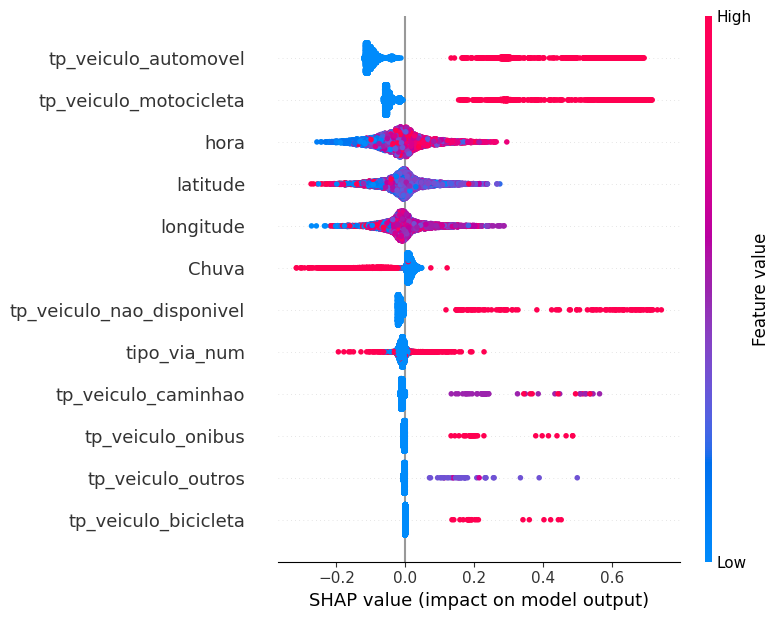

C:\Users\pirsp\AppData\Local\Temp\ipykernel_29132\1063239192.py:9: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[:, :, 1], X_test, plot_type="bar", max_display=15, show=True)


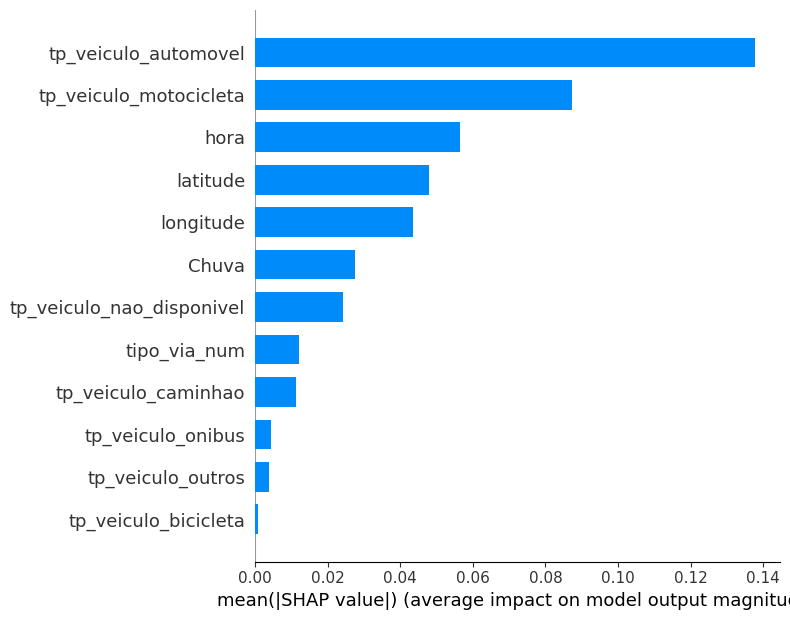

In [13]:
explainer = shap.Explainer(model.predict_proba, X_train)
shap_values = explainer(X_test)

# Gráfico de Resumo Detalhado (Beeswarm) para a classe 1
# Usamos max_display para mostrar as 15 features mais importantes
shap.summary_plot(shap_values[:, :, 1], X_test, max_display=15, show=True)

# Gráfico de Barras (Importância Global) para a classe 1
shap.summary_plot(shap_values[:, :, 1], X_test, plot_type="bar", max_display=15, show=True)